In [41]:
import os
os.chdir('..\\') # in ./tests folder - so changing to parent folder for imports
from consts import FOLDER2FLOW_RESULTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class df_extra:    
    def __init__(self, df):
        self.df = df
        self.num_rows = df.shape[0]
        self.data_dict = {}

    def add_data_to_df(self, col_name, data):
        self.data_dict[col_name] = [data]*self.num_rows
        self.df[col_name] = data

def create_united_df(date_folder, timelimit=600): # This is a df of all networks in folder
    res_dp = os.path.join(FOLDER2FLOW_RESULTS, date_folder)
    dfs_list = []
    for network in sorted(os.listdir(res_dp), reverse=True):
        df_fp = os.path.join(res_dp, network, "results.df")
        if network.endswith(".log") or not os.path.exists(df_fp):
            continue
        df = pd.read_pickle(df_fp)

        _df_extra = df_extra(df)
        _df_extra.add_data_to_df("network", network)
        _df_extra.add_data_to_df("mu", network.split("_")[1])

        dfs_list.append(df)
    df = pd.concat(dfs_list)
    df.reset_index(inplace=True)
    del df["index"]
    
    # replace names to shorter names for readabilty
    df["algo"].replace(f"NLP-100-TL-{timelimit}", "NLP100", inplace=True)
    df["algo"].replace(f"NLP-150-TL-{timelimit}", "NLP150", inplace=True)
    df["algo"].replace(f"NLP-200-TL-{timelimit}", "NLP200", inplace=True)
    
    df["algo"].replace(f"LLP-100", "LLP100", inplace=True)
    df["algo"].replace(f"louvain-ILP-num_com_bound 150", "LLP150", inplace=True)
    df["algo"].replace(f"louvain-ILP-num_com_bound 200", "LLP200", inplace=True)
    
    return df

def run_visu(input_folder):
    df = create_united_df(input_folder)
    return df

def run_visu_benchmark(input_folder):
    res_dp = os.path.join(FOLDER2FLOW_RESULTS, input_folder)
    dfs_list = []
    for network in sorted(os.listdir(res_dp), reverse=True):
        df_fp = os.path.join(res_dp, network, "results.df")
        if network.endswith(".log") or not os.path.exists(df_fp):
            continue
        df = pd.read_pickle(df_fp)

        _df_extra = df_extra(df)
        _df_extra.add_data_to_df("network", network)

        dfs_list.append(df)
    df = pd.concat(dfs_list)
    df.reset_index(inplace=True)
    del df["index"]
    return df

def create_bar_graphs_benchmark(df,title="Graph",evals=["modularity - algo", "jaccard","graph_accuracy","graph_conductance"]):
    for eval in evals:
        ax = sns.barplot(x="network", y=eval, hue="algo", data=df).set(title=title)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()

def create_bar_graphs(df,title="Graph",evals=["modularity - algo", "jaccard","graph_accuracy","graph_conductance"]):
    for eval in evals:
        ax = sns.barplot(x="mu", y=eval, hue="algo", data=df).set(title=title)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()

In [44]:
# on yeast and arabidopsis
# input_folder = "31-05-2022--17-44-19 ara mod"
# df = run_visu_benchmark(input_folder)
# display(df)
# create_bar_graphs(df)

,algo,modularity - real,modularity - algo,jaccard,graph_conductance,graph_sensitivity,graph_accuracy,num communities - real,num communities - algo,num_coms_divided,num_coms_skipped,number_of_mega_nodes,time-sec,network,mu
0,Louvain,0.363148,0.363821,0.504760,0.419840,0.978,0.813699,30,19,NaN,NaN,None,0.174008,1000_0.6_9,0.6
1,Newman,0.363148,0.320815,0.151359,0.449694,0.816,0.487295,30,8,NaN,NaN,None,0.632842,1000_0.6_9,0.6
2,NLP-100-TL-2400,0.363148,0.321051,0.154032,0.440523,0.816,0.505379,30,9,1.0,5.0,None,22.588197,1000_0.6_9,0.6
3,NLP-150-TL-2400,0.363148,0.337106,0.323700,0.392356,0.842,0.703032,30,19,7.0,1.0,None,480.422090,1000_0.6_9,0.6
4,NLP-200-TL-2400,0.363148,0.318643,0.144852,0.453567,0.840,0.489285,30,8,1.0,1.0,None,2533.229047,1000_0.6_9,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Louvain,0.565407,0.565846,0.939918,0.603204,1.000,0.978775,32,30,NaN,NaN,None,1.057482,1000_0.4_4,0.4
126,Newman,0.565407,0.565846,0.939918,0.603204,1.000,0.978775,32,30,NaN,NaN,None,6.744705,1000_0.4_4,0.4
127,NLP-100-TL-2400,0.565407,0.565360,0.965798,0.601962,0.999,0.988444,32,31,12.0,0.0,None,810.287086,1000_0.4_4,0.4
128,NLP-150-TL-2400,0.565407,0.565846,0.939918,0.603204,1.000,0.978775,32,30,10.0,0.0,None,1468.989558,1000_0.4_4,0.4


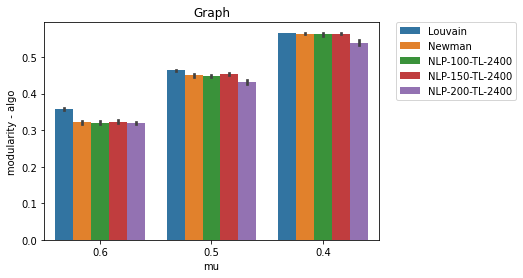

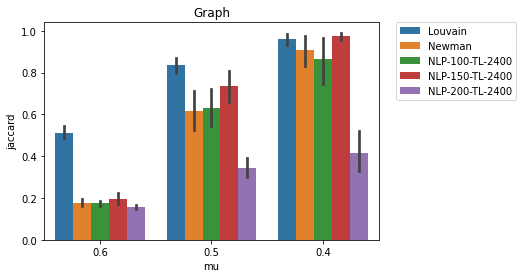

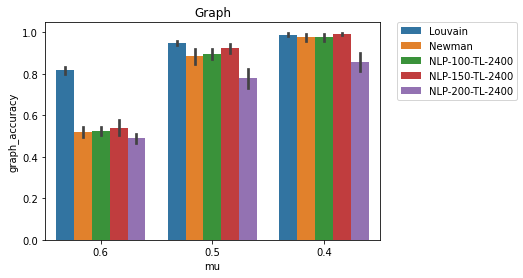

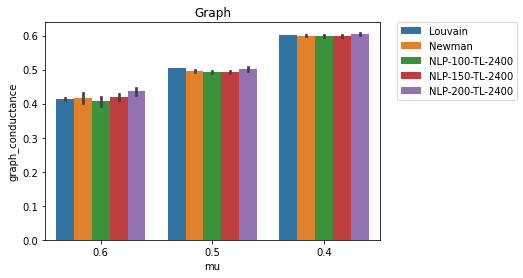

In [46]:
input_folder = "17-05-2022--23-06-48-newman"
df = run_visu(input_folder)
display(df)
create_bar_graphs(df)

